In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

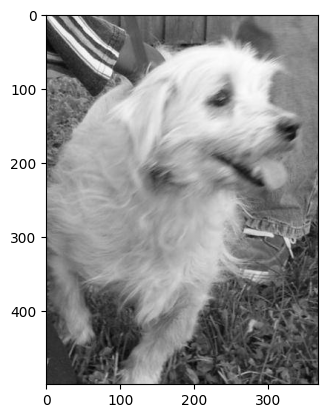

In [2]:
img = cv2.imread("train/dog.9.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")
plt.show()

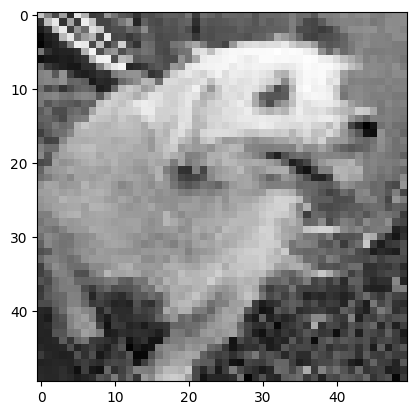

In [3]:
img_size = 50

new_array = cv2.resize(img,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [4]:
training_data = []
# cat = 0 && dog = 1
def create_training_data():
  path = "train"
  for img in os.listdir(path):
    try:
      if('cat' in img):
        cl = 0
      else:
        cl = 1
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(img_size,img_size))
      training_data.append([new_array,cl])
    except Exception as e:
      pass

create_training_data()


In [5]:
import random

random.shuffle(training_data)

In [6]:
X = []
y = []
for features,label in training_data:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1,img_size,img_size,1)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import time

In [8]:
X = X / 255.0

dense_layer = 0
layer_size = 64
conv_layer = 3

model = Sequential()
model.add(Conv2D(layer_size,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

for l in range(conv_layer-1):
  model.add(Conv2D(layer_size,(3,3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

for l in range(dense_layer):
  model.add(Dense(layer_size))
  model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
y = np.array(y)
model.fit(X,y,batch_size=32,validation_split=0.3,epochs=10)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 111s 200ms/step - accuracy: 0.5698 - loss: 0.6742 - val_accuracy: 0.7087 - val_loss: 0.5723
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 116s 212ms/step - accuracy: 0.7114 - loss: 0.5562 - val_accuracy: 0.7285 - val_loss: 0.5429
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 106s 193ms/step - accuracy: 0.7644 - loss: 0.4965 - val_accuracy: 0.7675 - val_loss: 0.4971
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 107s 195ms/step - accuracy: 0.7936 - loss: 0.4423 - val_accuracy: 0.7849 - val_loss: 0.4595
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 107s 195ms/step - accuracy: 0.8110 - loss: 0.4079 - val_accuracy: 0.7887 - val_loss: 0.4587
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 117s 214ms/step - accuracy: 0.8290 - loss: 0.3763 - val_accuracy: 0.7969 - val_loss: 0.4523
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 140s 211ms/step - accuracy: 0.8438 - loss: 0.3533 - val_accuracy: 0.8020 - val_loss: 0.4328
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 106s 194ms/step - accuracy: 0.8566 -

In [10]:
model.save('64x3-CNN.keras')

In [33]:
categories = ["cat","dog"]

def prepare(filepath):
  img_size = 50
  img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array,(img_size,img_size))
  return new_array.reshape(-1,img_size,img_size,1)

model = tf.keras.models.load_model("64x3-CNN.keras")
p = prepare("test1/2017.jpg")
prediction = model.predict([p])
print(categories[int(prediction[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
cat


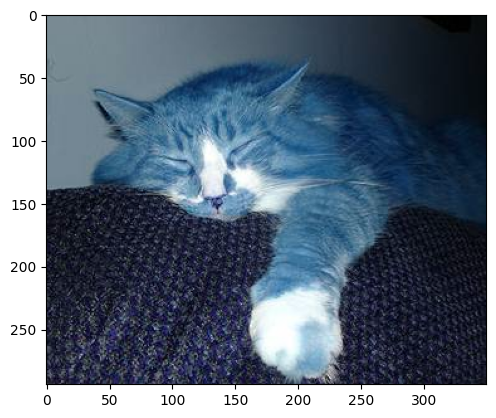

In [34]:
p = cv2.imread("test1/2017.jpg")
plt.imshow(p)
plt.show()